## Criterio 3 Clúster

Nivel 4 (destacado) 
- Los comentarios sobre los resultados de los grupos son pertinentes.
- El informe sobre los clúster esta muy bien hecho.


### Importando Librerias

In [41]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Scikit-learn
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

### Lectura de archivo pre-procesado (sin nulos)

In [4]:
# Lectura de datos (sin nulos)
df_base_pre_processed = pd.read_csv("CTG_PREPROCESS.csv")
df_base_pre_processed.head(5)

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


### Graficando datos iniciales

<Axes: xlabel='LB', ylabel='AC'>

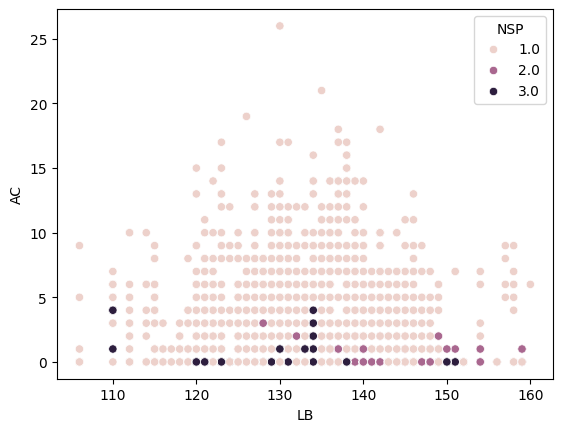

In [27]:
# Visualizando los datos
sns.scatterplot(data=df_base_pre_processed, x='LB', y='AC', hue='NSP')

### Entrenando el modelo

In [50]:
semilla_aleatoria=0
df_base_cluster=df_base_pre_processed.copy()
X = df_base_cluster[['AC','LB']]
y = df_base_cluster[['NSP']]
# In the first step we will split the data in training and remaining dataset
# En el primer paso separamos la data en entrenamiento y pruebas, un 33% para entrenamiento y 67% para pruebas
train_x,test_x,train_y,test_y = train_test_split(X,y, train_size=0.33, random_state=semilla_aleatoria)
print(y)

      NSP
0     2.0
1     1.0
2     1.0
3     1.0
4     1.0
...   ...
2121  2.0
2122  2.0
2123  2.0
2124  2.0
2125  1.0

[2126 rows x 1 columns]


#### Normalizando y evaluando el modelo

In [51]:
X_train_norm = preprocessing.normalize(train_x)
X_test_norm = preprocessing.normalize(test_x)
#Fitting and Evaluating the Model
kmeans = KMeans(n_clusters=3, random_state=semilla_aleatoria, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

### Graficando agrupamiento

<Axes: xlabel='LB', ylabel='AC'>

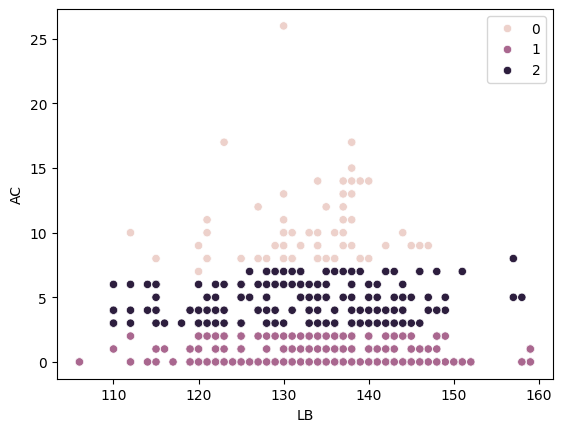

In [37]:
# Visualizando los datos
sns.scatterplot(data=train_x, x='LB', y='AC', hue=kmeans.labels_)

### Realizando evaluacion del modelo entrenado con las siguientes metricas

In [52]:
print("Homogeneity: {0:0.3f}".format(metrics.homogeneity_score(train_y['NSP'], kmeans.labels_)))
print("Completeness: {0:0.3f}".format(metrics.completeness_score(train_y['NSP'], kmeans.labels_)))
print("V_measure: {0:0.3f}".format(metrics.v_measure_score(train_y['NSP'], kmeans.labels_)))
print("Adjusted random: {0:0.3f}".format(metrics.adjusted_rand_score(train_y['NSP'], kmeans.labels_))) 
print("Adjusted mutual info: {0:0.3f}".format(metrics.adjusted_mutual_info_score(train_y['NSP'], kmeans.labels_))) 
print("Silhouette: {0:0.3f}".format(metrics.silhouette_score(train_x, kmeans.labels_, metric='euclidean', sample_size=300))) 

Homogeneity: 0.146
Completeness: 0.111
V_measure: 0.126
Adjusted random: -0.105
Adjusted mutual info: 0.123
Silhouette: 0.106


<Axes: ylabel='NSP'>

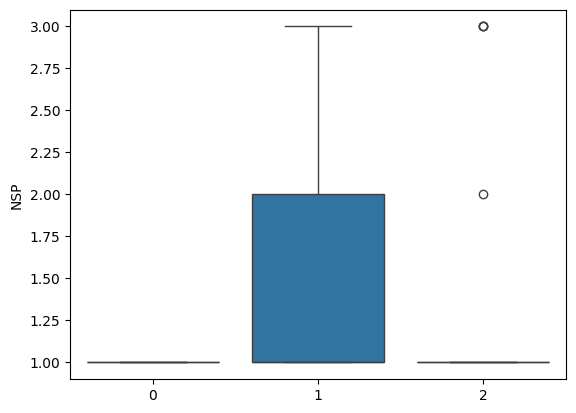

In [38]:
sns.boxplot(x = kmeans.labels_, y = train_y['NSP'])